In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = gdal.Open("Whole_Nepal_DEM.tif", gdal.GA_ReadOnly)

In [3]:
print(type(dataset))

<class 'osgeo.gdal.Dataset'>


In [5]:
band = dataset.GetRasterBand(1).ReadAsArray()
band.shape

(5269, 9065)

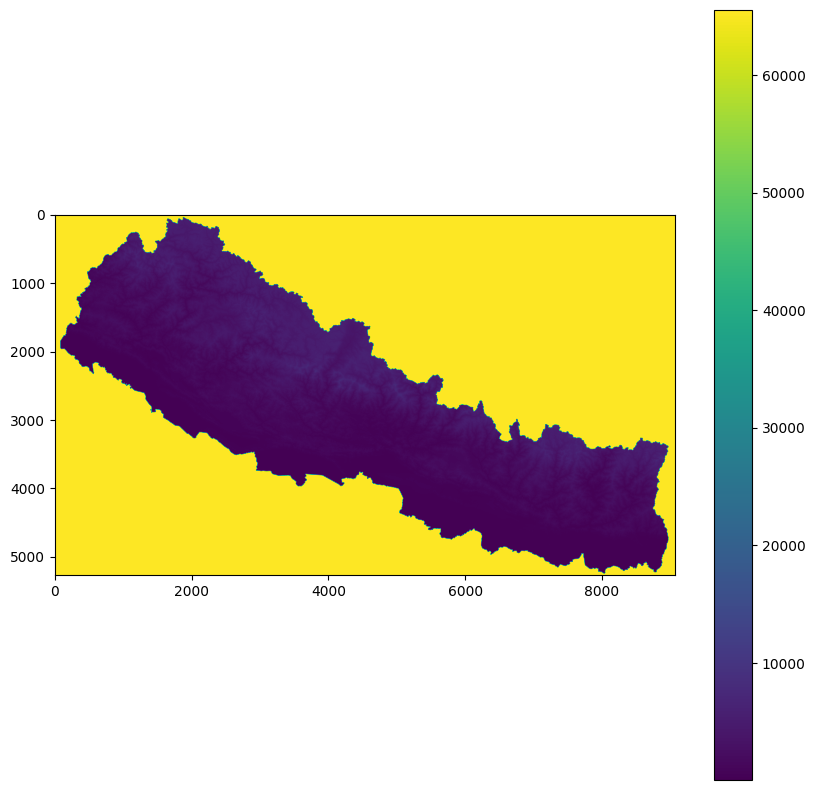

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(band)
plt.colorbar()

In [10]:
print("Projecton: ", dataset.GetProjection())
print("Column: ", dataset.RasterXSize)
print("Rows: ", dataset.RasterYSize)
print("Bands:", dataset.RasterCount)

Projecton:  PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]
Column:  9065
Rows:  5269
Bands: 1


In [13]:
ndv = dataset.GetRasterBand(1).GetNoDataValue()
print(ndv)

65535.0


In [14]:
dataset.GetRasterBand(1).SetNoDataValue(ndv)

0

In [15]:
import os
print(os.getcwd())

d:\gdalTry


In [16]:
fn_copy = "d:/gdalTry/gdal_copy.tif"
copy = gdal.GetDriverByName('GTiff').CreateCopy(fn_copy, dataset)
copy

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000014E8E5EE340> >

In [19]:
data_array = dataset.GetRasterBand(1).ReadAsArray()
data_min = np.max(data_array)
print(data_min)

65535


In [20]:
data_array = dataset.GetRasterBand(1).ReadAsArray()  # read band data from the existing raster
data_nan = np.where(data_array == ndv, np.nan, data_array)  # set all the no data values to np.nan so we can easily calculate the minimum elevation
data_min = np.min(data_nan)  # get the minimum elevation value (excluding nan)
data_stretch = np.where(data_array == ndv, ndv, (data_array - data_min) * 1.5)  # now apply the strech algorithm
dataset.GetRasterBand(1).WriteArray(data_stretch)  # write the calculated values to the raster
ds_copy = None  # properly close the raster

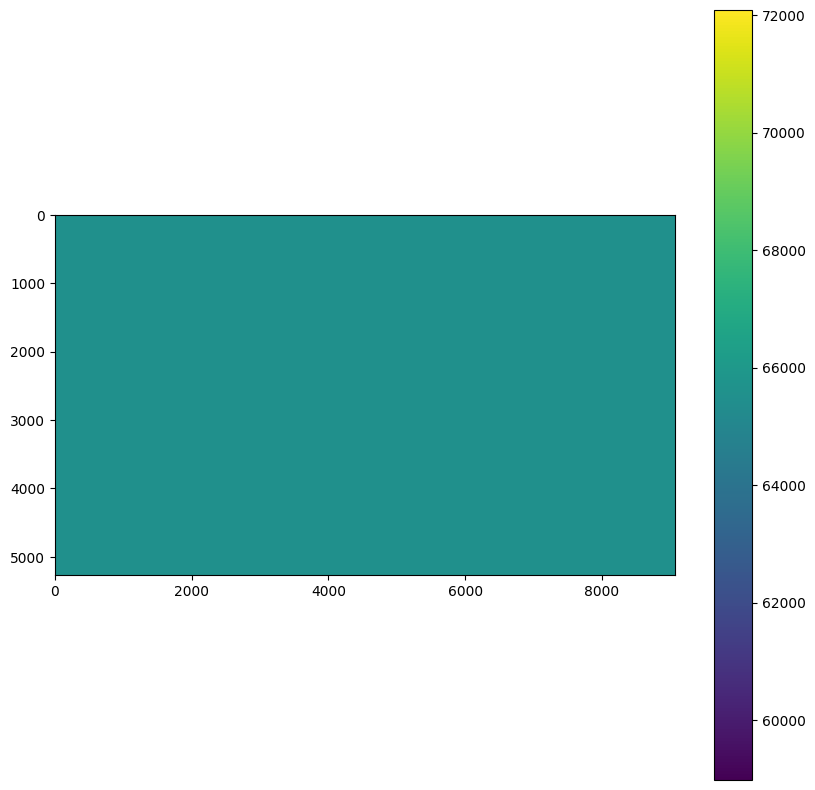

In [21]:
ds_copy = gdal.Open(fn_copy)
data_stretch = ds_copy.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(10, 10))
plt.imshow(data_stretch)
plt.colorbar()